# Notebook to make the paper plots for step 1-SignalSelection

This notebook allow researchers to reproduce the paper plots for step 1-SignalSelection, plus identify the best choice for this step.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

def harmonic(p,r):
    
    return 0 if p == 0 or r == 0 else (2 * p * r) / (p + r)

# Baseline Cross Validation

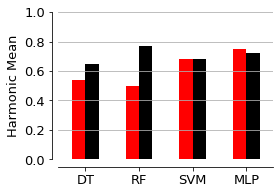

In [4]:
MeanResult = {
    "Classifier":[],  
    "Red":[],   
    "Accuracy":[]   
}    

if not os.path.exists('fig'):
    os.makedirs('fig')    


for selected in ["All"]:
    for classifier in ["tree","forest","svm","mlp"]:
        MeanResult['Classifier'].append(classifier)
        df = pd.read_csv("1-SignalSelection/CV_%s-%s.csv"%(selected,classifier),sep=";")

        df['meanF'] = df.apply(lambda row: (harmonic(row['D1R-F1'],row['D2R-F1'])), axis=1) 
        df['meanA'] = df.apply(lambda row: (harmonic(row['D1Accuracy'],row['D2Accuracy'])), axis=1) 
        Sorted_DF = df.sort_values(['meanF', 'meanA'], ascending=[False, False])

        MeanF = float(Sorted_DF['meanF'].iloc[0])
        MeanA = float(Sorted_DF['meanA'].iloc[0])

        MeanResult["Red"].append(MeanF)
        MeanResult["Accuracy"].append(MeanA)


fig, ax = plt.subplots(figsize=(4,2.8)) 
df = pd.DataFrame(MeanResult)

df.plot(kind='bar', rot=0, ax=ax, color = ["red","black"]) #"green","orange",

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.03))


ax.set_ylabel("Harmonic Mean", fontsize=13)
ax.set_yticks([i/10 for i in range(0,11,2)])
ax.set_yticklabels([i/10 for i in range(0,11,2)], fontsize=13, rotation=0)
ax.set_ylim(0,1)
ax.set_xticklabels(["DT","RF","SVM","MLP"], fontsize=13)#, rotation=45)
ax.yaxis.grid()
ax.get_legend().remove()
plt.tight_layout()  
plt.savefig('fig/CV_baseline.pdf')
plt.show()
plt.close()

# Baseline Time Seris

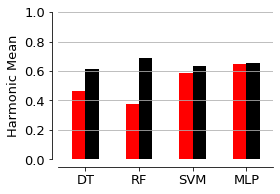

In [5]:
MeanResult = {
    "Classifier":[],  
    "Red":[],   
    "Accuracy":[]   
}    


for selected in ["All"]:
    for classifier in ["tree","forest","svm","mlp"]:
        MeanResult['Classifier'].append(classifier)
        df = pd.read_csv("1-SignalSelection/TS_%s-%s_3.csv"%(selected,classifier),sep=";")

        df['meanF'] = df.apply(lambda row: (harmonic(row['D1R-F1'],row['D2R-F1'])), axis=1) 
        df['meanA'] = df.apply(lambda row: (harmonic(row['D1Accuracy'],row['D2Accuracy'])), axis=1) 
        Sorted_DF = df.sort_values(['meanF', 'meanA'], ascending=[False, False])

        MeanF = float(Sorted_DF['meanF'].iloc[0])
        MeanA = float(Sorted_DF['meanA'].iloc[0])
        MeanResult["Red"].append(MeanF)
        MeanResult["Accuracy"].append(MeanA)


if not os.path.exists('fig'):
    os.makedirs('fig')    

        
fig, ax = plt.subplots(figsize=(4,2.8)) 
df = pd.DataFrame(MeanResult)

df.plot(kind='bar', rot=0, ax=ax, color = ["red","black"]) 
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('axes', -0.05))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('axes', -0.03))


ax.set_ylabel("Harmonic Mean", fontsize=13)
ax.set_yticks([i/10 for i in range(0,11,2)])
ax.set_yticklabels([i/10 for i in range(0,11,2)], fontsize=13, rotation=0)
ax.set_ylim(0,1)
ax.set_xticklabels(["DT","RF","SVM","MLP"], fontsize=13)
ax.yaxis.grid()
ax.get_legend().remove()
plt.tight_layout()  
plt.savefig('fig/TS_baseline.pdf')
plt.show()
plt.close()

# Signal Selection Cross Validation

tree


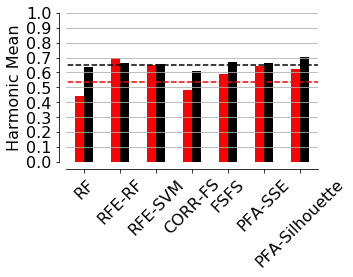

svm


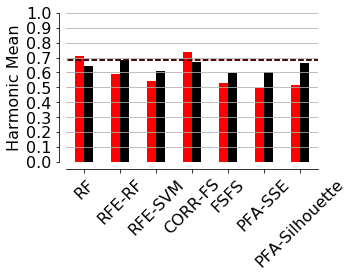

mlp


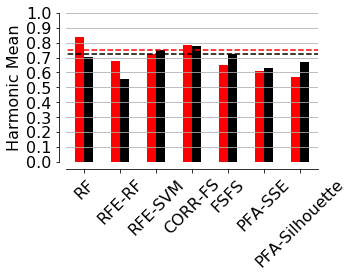

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


legend = {
        "All":"Baseline",
        "RF":"RF",
        "RFERF":"RFE-RF",
        "RFESVM" :"RFE-SVM",
        "PFASSE":"PFA-SSE",
        "PFASilhouette":"PFA-Silhouette",
        "original_Correlation":"original",
        "Correlation":"CORR-FS",
        "FSFS":"FSFS",
        "Total":"Total"    
        }

if not os.path.exists('fig'):
    os.makedirs('fig')    


for classifier in ["tree","svm","mlp"]:#,"forest","svm","mlp"]:

    MeanResult = {
            "selected":[],  
            "Red":[],    
            "Accuracy":[]    
        }    

    
    for selected in ["All","RF","RFERF","RFESVM","Correlation","FSFS","PFASSE","PFASilhouette"]:
        MeanResult['selected'].append(legend[selected])

        df = pd.read_csv("1-SignalSelection/CV_%s-%s.csv"%(selected,classifier),sep=";")

        df['meanF'] = df.apply(lambda row: (harmonic(row['D1R-F1'],row['D2R-F1'])), axis=1) 
        df['meanA'] = df.apply(lambda row: (harmonic(row['D1Accuracy'],row['D2Accuracy'])), axis=1) 
        Sorted_DF = df.sort_values(['meanF', 'meanA'], ascending=[False, False])

        MeanF = float(Sorted_DF['meanF'].iloc[0])
        MeanA = float(Sorted_DF['meanA'].iloc[0])
        MeanResult["Red"].append(MeanF)
        MeanResult["Accuracy"].append(MeanA)


    print(classifier)
    df = pd.DataFrame(MeanResult)

    fig, ax = plt.subplots(figsize=(5,4)) 
        
    df2 = df[df['selected']!="Baseline"]
    df2.plot(kind='bar', rot=0, ax=ax, color = ["red","black"])#,"red","black","red","black","red","black"],)

    baseF = df[df['selected']=="Baseline"]['Red']
    baseA = df[df['selected']=="Baseline"]['Accuracy']
    ax.plot([-2,10],[baseF,baseF],color="r",linestyle="--")
    ax.plot([-2,10],[baseA,baseA],color="k",linestyle="--")
    
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.05))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('axes', -0.03))

    ax.set_ylabel("Harmonic Mean",fontsize=16)
    ax.set_yticks([i/10 for i in range(0,11)])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax.set_ylim(0,1)
    ax.set_xticklabels(df2['selected'], rotation=45,fontsize=16)
    ax.yaxis.grid()
    ax.get_legend().remove()
    plt.tight_layout()  
    plt.savefig("fig/CVSS_"+classifier+"_Performance.pdf")
    plt.show()
    plt.close()


# Signal Selection Time Series

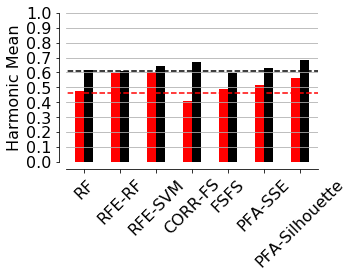

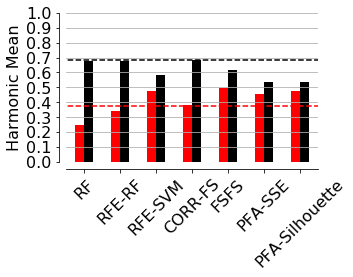

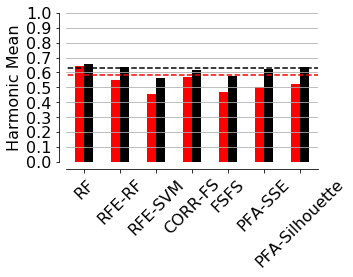

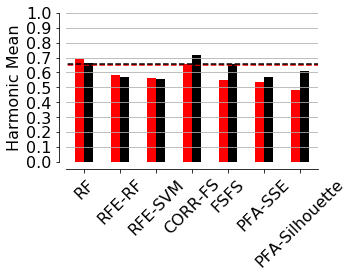

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


legend = {
        "All":"Baseline",
        "RF":"RF",
        "RFERF":"RFE-RF",
        "RFESVM" :"RFE-SVM",
        "PFASSE":"PFA-SSE",
        "PFASilhouette":"PFA-Silhouette",
        "original_Correlation":"original",
        "Correlation":"CORR-FS",
        "FSFS":"FSFS",
        "Total":"Total"    
        }

if not os.path.exists('fig'):
    os.makedirs('fig')    

    
for classifier in ["tree","forest","svm","mlp"]:

    MeanResult = {
            "selected":[],  
            "Red":[],    
            "Accuracy":[]    
        }    

    
    for selected in ["All","RF","RFERF","RFESVM","Correlation","FSFS","PFASSE","PFASilhouette"]:
        MeanResult['selected'].append(legend[selected])

        df = pd.read_csv("1-SignalSelection/TS_%s-%s_3.csv"%(selected,classifier),sep=";")

        df['meanF'] = df.apply(lambda row: (harmonic(row['D1R-F1'],row['D2R-F1'])), axis=1) 
        df['meanA'] = df.apply(lambda row: (harmonic(row['D1Accuracy'],row['D2Accuracy'])), axis=1) 
        Sorted_DF = df.sort_values(['meanF', 'meanA'], ascending=[False, False])

        MeanF = float(Sorted_DF['meanF'].iloc[0])
        MeanA = float(Sorted_DF['meanA'].iloc[0])
        MeanResult["Red"].append(MeanF)
        MeanResult["Accuracy"].append(MeanA)


    df = pd.DataFrame(MeanResult)

    fig, ax = plt.subplots(figsize=(5,4)) 
        
    df2 = df[df['selected']!="Baseline"]
    df2.plot(kind='bar', rot=0, ax=ax, color = ["red","black"])#,"red","black","red","black","red","black"],)

    baseF = df[df['selected']=="Baseline"]['Red']
    baseA = df[df['selected']=="Baseline"]['Accuracy']
    ax.plot([-2,10],[baseF,baseF],color="r",linestyle="--")
    ax.plot([-2,10],[baseA,baseA],color="k",linestyle="--")
    
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('axes', -0.05))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('axes', -0.03))

    ax.set_ylabel("Harmonic Mean",fontsize=16)
    ax.set_yticks([i/10 for i in range(0,11)])
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax.set_ylim(0,1)
    ax.set_xticklabels(df2['selected'], rotation=45,fontsize=16)
    ax.yaxis.grid()
    ax.get_legend().remove()
    plt.tight_layout()  
    plt.savefig("fig/TSSS_"+classifier+"_Performance.pdf")
    plt.show()
    plt.close()

